In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import ISLP

In [38]:
df = pd.read_csv("College.csv")
df.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

[[<Axes: xlabel='Apps', ylabel='Apps'>
  <Axes: xlabel='Accept', ylabel='Apps'>
  <Axes: xlabel='Enroll', ylabel='Apps'>
  <Axes: xlabel='Top10perc', ylabel='Apps'>
  <Axes: xlabel='Top25perc', ylabel='Apps'>
  <Axes: xlabel='F.Undergrad', ylabel='Apps'>
  <Axes: xlabel='P.Undergrad', ylabel='Apps'>
  <Axes: xlabel='Outstate', ylabel='Apps'>
  <Axes: xlabel='Room.Board', ylabel='Apps'>
  <Axes: xlabel='Books', ylabel='Apps'>
  <Axes: xlabel='Personal', ylabel='Apps'>
  <Axes: xlabel='PhD', ylabel='Apps'>
  <Axes: xlabel='Terminal', ylabel='Apps'>
  <Axes: xlabel='S.F.Ratio', ylabel='Apps'>
  <Axes: xlabel='perc.alumni', ylabel='Apps'>
  <Axes: xlabel='Expend', ylabel='Apps'>
  <Axes: xlabel='Grad.Rate', ylabel='Apps'>]
 [<Axes: xlabel='Apps', ylabel='Accept'>
  <Axes: xlabel='Accept', ylabel='Accept'>
  <Axes: xlabel='Enroll', ylabel='Accept'>
  <Axes: xlabel='Top10perc', ylabel='Accept'>
  <Axes: xlabel='Top25perc', ylabel='Accept'>
  <Axes: xlabel='F.Undergrad', ylabel='Accept'>
  <A

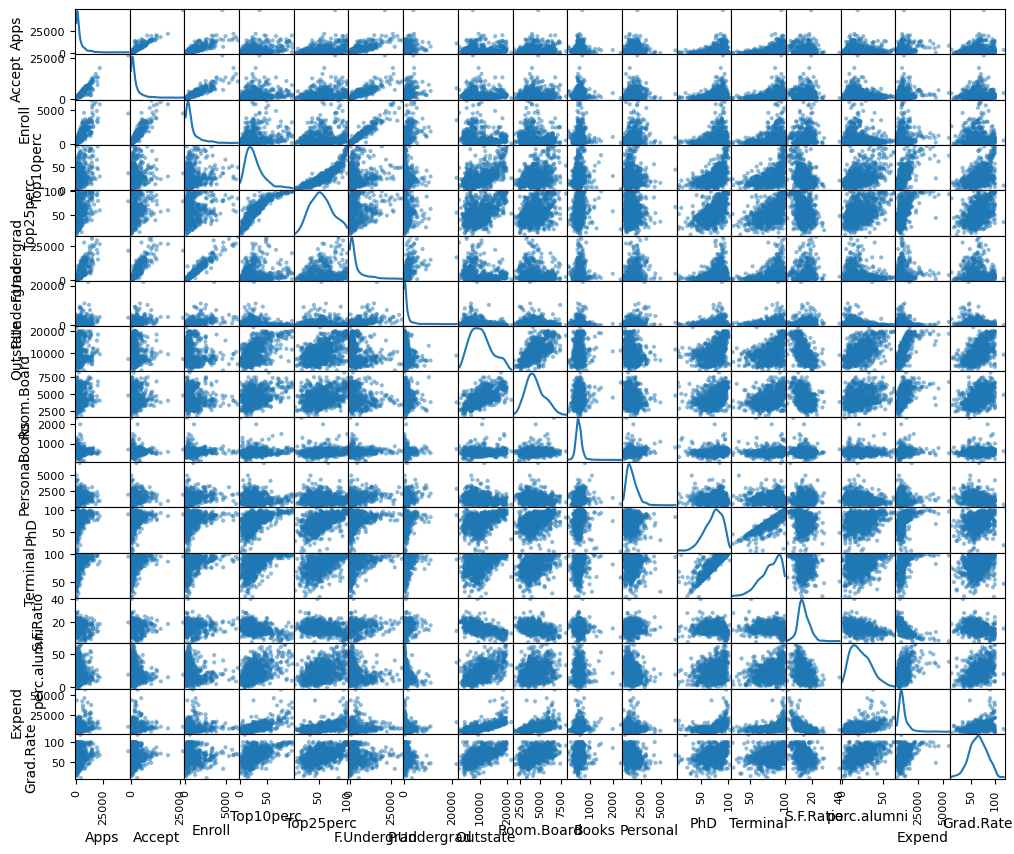

In [42]:
print(pd.plotting.scatter_matrix(df.loc[:,'Apps':'Grad.Rate'], figsize=(12,10), diagonal = 'kde'))

In [43]:
correlation_matrix = df.loc[:,'Apps':'Grad.Rate'].corr()
correlation_matrix.style.background_gradient(cmap = 'Greens').format("{:.2f}")

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.00,0.94,0.85,0.34,0.35,0.81,0.40,0.05,0.16,0.13,0.18,0.39,0.37,0.10,-0.09,0.26,0.15
Accept,0.94,1.00,0.91,0.19,0.25,0.87,0.44,-0.03,0.09,0.11,0.20,0.36,0.34,0.18,-0.16,0.12,0.07
Enroll,0.85,0.91,1.00,0.18,0.23,0.96,0.51,-0.16,-0.04,0.11,0.28,0.33,0.31,0.24,-0.18,0.06,-0.02
Top10perc,0.34,0.19,0.18,1.00,0.89,0.14,-0.11,0.56,0.37,0.12,-0.09,0.53,0.49,-0.38,0.46,0.66,0.49
Top25perc,0.35,0.25,0.23,0.89,1.00,0.20,-0.05,0.49,0.33,0.12,-0.08,0.55,0.52,-0.29,0.42,0.53,0.48
F.Undergrad,0.81,0.87,0.96,0.14,0.20,1.00,0.57,-0.22,-0.07,0.12,0.32,0.32,0.30,0.28,-0.23,0.02,-0.08
P.Undergrad,0.40,0.44,0.51,-0.11,-0.05,0.57,1.00,-0.25,-0.06,0.08,0.32,0.15,0.14,0.23,-0.28,-0.08,-0.26
Outstate,0.05,-0.03,-0.16,0.56,0.49,-0.22,-0.25,1.00,0.65,0.04,-0.30,0.38,0.41,-0.55,0.57,0.67,0.57
Room.Board,0.16,0.09,-0.04,0.37,0.33,-0.07,-0.06,0.65,1.00,0.13,-0.20,0.33,0.37,-0.36,0.27,0.50,0.42
Books,0.13,0.11,0.11,0.12,0.12,0.12,0.08,0.04,0.13,1.00,0.18,0.03,0.10,-0.03,-0.04,0.11,0.00


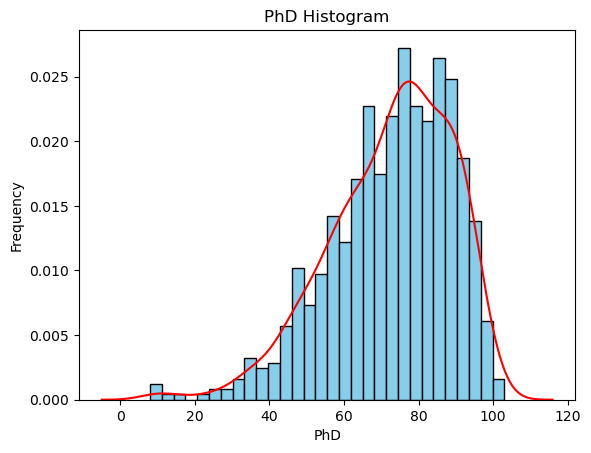

In [44]:
#plotting PhD
plt.hist(df['PhD'], bins=30, color='skyblue', edgecolor='black', density =True)
sns.kdeplot(df['PhD'], color='red')
plt.ylabel('Frequency')
plt.title('PhD Histogram')
plt.show()

In [45]:
#estimating logistic regression
df['Private'] = df['Private'].replace({'Yes': 1, 'No': 0})
df = df.drop('Unnamed: 0', axis=1)
y = df['Private']
X = df.loc[:, 'Apps':'Grad.Rate']

/var/folders/8r/lp807dgx5l1g14nqdf2kk0_m0000gn/T/ipykernel_14128/2568854248.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Private'] = df['Private'].replace({'Yes': 1, 'No': 0})


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 109.4 KB


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

#running logistic regression
logmod1 = LogisticRegression(max_iter=5000) #failed ot converge in 1000 so increased max_iter
logmod1.fit(X, y)

pred_10 = logmod1.predict(X[:10])
print(pred_10)# Print predicted values for first 10 observations

[0 1 1 1 1 1 1 1 1 1]


In [60]:
#confusion matrix
y_pred = logmod1.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

accuracy = accuracy_score(y, y_pred)
print(accuracy)

[[191  21]
 [ 22 543]]
0.9446589446589446


In [62]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test = X[:527], X[527:]
y_train, y_test = y[:527], y[527:] #from 528


In [66]:
#fitting model again 
logmod2 = LogisticRegression(max_iter=10000) #convergence still failing will need to scale the X dataset
logmod2.fit(X_train, y_train)
pred_y = logmod2.predict(X_test)

print(f"predicted vals: {pred_y}")

tcf = confusion_matrix(y_test, pred_y)
acc = accuracy_score(y_test, pred_y)

print(f"Test Confusion Matrix:\n{tcf}")
print(f"Test Accuracy: {acc:.2f}")
#the accuracy reduced when lesser training data

predicted vals: [1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
Test Confusion Matrix:
[[ 96  18]
 [  5 131]]
Test Accuracy: 0.91


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
